In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression

In [145]:
data=pd.read_excel('data/data1.xlsx')
for i in range(2,35):
    d=pd.read_excel('data/data'+str(i)+'.xlsx')
    data=pd.concat([data,d],axis=0,ignore_index=True)

In [146]:
data.head()

,Name,Comment,Label
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0
1,Preetom Mazumder,"Like I said, World Cup of Goalkeepers",NaN
2,Mizanur Rahman Rupok,Well played Canada 🇨🇦🇨🇦🇨🇦 bed luck..,NaN
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0


# Preprocessing

In [147]:
#drop the rows with Label==nan
data.dropna(subset=['Label'],inplace=True)

In [148]:
from bangla_stemmer.stemmer import stemmer
# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    stmr = stemmer.BanglaStemmer()
    stm = stmr.stem(Comment.split())
    ss = ' '.join(stm)
    return ss
     

In [149]:
# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
appli

In [150]:
data.head(17)

,Name,Comment,Label,cleaned
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,খেললো কানাডাজিতলো লেংড়াডা
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,৫০ধাপ নিচ দল থেক হার পর ও যার চেঁচায় তার পৃথিব...
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,কানা ভাগ্য খারাপ না হয় বেলজিয়াম খারাপ খবর ছিল ...
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,তবে খেলা ভালো হয়
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেলা আশ...
7,Faysal Ahamed,ভালো খেললেই জিতা জায় না এটা তার প্রমান 😂,2.0,ভালো খেললে জিতা জায় না এটা তার প্রমান
8,Md Kamruzzaman,যদিও ১-০ গোলে হারছে। তবুও এই কানাডা দূর্দান্ত ...,2.0,যদি ১ ০ গোলে হার তবু এই কানাডা দূর্দান্ত এর সে...
9,Mia Ashik,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না 🇧🇪😪বেলজি...,2.0,২০১৮ সাল বেলজিয়াম খুঁজে পাচ্ না বেলজিয়াম কিভাব...
10,Zahadul Islam Parvez,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...,1.0,বর্তমান সময় বিশ্ব অন্যতম সের গোলরক্ষক কর্তুয়া
12,M Russell Islam Raz,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...,2.0,এক ভালো ফিনিশার অভাবে এত ভালো খাল শেষ পর্যন্ত ...


In [151]:
#length of the comments
data['length'] = data['cleaned'].apply(lambda x: len(x.split()))

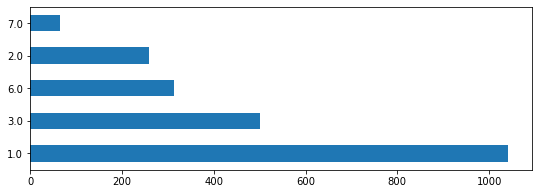

In [152]:
#drop the rows with length==0
data.drop(data[data['length']==0].index,inplace=True)
#drop the name column
data.drop('Name',axis=1,inplace=True)
#change the label 4,5 to 1
data['Label'].replace({4:1,5:1},inplace=True)
data['Label'].value_counts().plot(kind='barh', figsize=(9, 3))
# shuffle the data
data = data.sample(frac=1).reset_index(drop=True)
#drop irrelevant comments
#drop the rows with Label==7 and reset the index
data.drop(data[data['Label']==7].index,inplace=True)


In [153]:
#value count of the labels
data['Label'].value_counts()

1.0    1042
3.0     500
6.0     313
2.0     259
Name: Label, dtype: int64

In [154]:
data.head(17)

,Comment,Label,cleaned,length
0,এই নাসার প্রযুক্তি তো আমাদের গ্রামের দাদুরা খা...,3.0,এই নাসা প্রযুক্তি তো আমা গ্রাম দাদু খায়নাসা আব...,12
1,বেডি মানুষ 😅,3.0,বেডি মানুষ,2
2,"বালের অঘটন,‌ সৌদি আরব হারলে অঘটন হতো",3.0,বাল অঘটন সৌদি আর হারলে অঘটন হত,7
3,"আর্জেন্টিনার জয় আমরা হেরে যায়,কিন্তুুু ধৈর্য্য...",1.0,আর্জেন্টিন জয় আম হার যায় কিন্তুুু ধৈর্য্য হারা...,26
4,নেইমার যদি অভিনেতা হয় মেসি তার বস 😎🥱,3.0,নেইম যদি অভিনেতা হয় মেসি তার বস,7
5,ফাইনালে না😂ফাইনালি ওরা দেশে ফিরে যাবে সবার আগে🤣😂,6.0,ফাইনালে না ফাইনা ওরা দেশ ফিরে যাবে সব আগে,9
6,"আর্জেন্টিনার পর, বিশ্বে আর্জেন্টিনা ফুটবলকে যদ...",1.0,আর্জেন্টিন পর বিশ্বে আর্জেন্টিনা ফুটবল যদি সবচ...,14
7,ওরে বাটপার,3.0,ওরে বাটপ,2
8,"হাহাহা, সব পাগল হয়ে গেছে!!",6.0,হাহাহা সব পাগল হয় গেছ,5
9,কানাডা খুব ভালো খেলছে । খুব চেস্টা করেও একটা গ...,2.0,কানাডা খুব ভালো খেল খুব চেস্ করে এক গোল কর পারেনি,11


# split dataset

In [155]:
#split the data into train and test
X=data['cleaned']
y=data['Label']
#train size 80% and test size 20%
X_train = X[:int(len(X)*0.8)]
X_test = X[int(len(X)*0.8):]
y_train = y[:int(len(y)*0.8)]
y_test = y[int(len(y)*0.8):]

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

#tfidf vectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [156]:
X_test_copy.head()

1739    ব্রাজিল সাথে তো আর্জেন্টিন কোন লেভেলে হয় না ক...
1740             আরজেন্টিনা ২রাউন্ড শুরুর তারিখ আপডেট দেন
1741    জেসুস তো বেঞ্চ প্লেয় ব্রাজিল না তবে দ্রুত সুস্...
1742          ওজিল অভাব একন হারে হারে টের পাচ্চে জার্মানি
1743                                      এই শালি এক রাজা
Name: cleaned, dtype: object

In [157]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred))

Accuracy:  0.5319148936170213


In [158]:
misclassified = 0
for i in range(0,len(y_pred)):
    #print only the misclassified comments
    if y_pred[i]!=y_test.iloc[i]:
        print('Actual label: ',y_test.iloc[i])
        print('Predicted label: ',y_pred[i])
        print('Comment: ',X_test_copy.iloc[i])
        misclassified+=1
  
    

Actual label:  3.0
Predicted label:  1.0
Comment:  এই শালি এক রাজা
Actual label:  2.0
Predicted label:  1.0
Comment:  লজ্জা থাকা উচিত
Actual label:  6.0
Predicted label:  1.0
Comment:  দ্বিতীয় ম্যাচ ধাক্কা না জানি কি করে
Actual label:  3.0
Predicted label:  1.0
Comment:  আমি জীবনে ও ব্ কে জিত দেখি নাই
Actual label:  2.0
Predicted label:  1.0
Comment:  সের খেলা খেল কানাডা ম্যাচ শাষ রবার্টো মার্টিনেজ বলেছেন ম্যাচ টা কানা জেতা প্রাপ্য ছিলো কারণ ওরা বছর পর বিশ্বকাপে আস দল যে কিভাবে এত ভালো খেললো বুঝতে পার না দল তারকা ডেভ পেনাল্টি মিস করে তাও ওরা সার মাঠে যে আদি বিস্ত করে তা নিশ্চয় প্রসংস্বনীয়
Actual label:  3.0
Predicted label:  1.0
Comment:  মেসি মনে হয় ফেরেস্তা সে ভুল কর পারেনা এ সালা ইহুদি এত টান কই দেলোয় হোস সাইদি জাল এত তাদের জন্য তো কিছু করেন্না সালা বাংগালী এই ইহুদি জন্য আজ ইজরায়েলের এত সাহস পায় মেসি ধোঁয়া তুলসি পাতা নাকি অর পায় নিচে সে কি কর তা তো ভিডি ক্লিপে দেখা যাচ্ছ্র
Actual label:  3.0
Predicted label:  1.0
Comment:  চুইয়ও না চুইয়ও না বন্ধু গো
Actual label:  2.0
Predicted labe

In [159]:
print('Total misclassified comments: ',misclassified)

Total misclassified comments:  198


In [160]:
logreg.predict(tfidf.transform(['বউ']))

array([3.])

In [161]:
print(X.shape)
print(X_train_copy.shape)
print(X_test_copy.shape)
print(len(y_pred))  

(2114,)
(1691,)
(423,)
423


In [162]:
#ensemble using bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(LogisticRegression(), max_samples=0.5, max_features=0.5)
bagging.fit(X_train_tfidf, y_train)
y_pred = bagging.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred))

Accuracy:  0.4988179669030733
